<a href="https://colab.research.google.com/github/kruthik003/Product-review/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [233]:
data = pd.read_csv('Ratings.csv',header = 0,nrows = 34661)

<ipython-input-233-4126ed319a38>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Ratings.csv',header = 0,nrows = 34661)


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [235]:
# data['asins'].unique()

In [236]:
from sklearn.model_selection import StratifiedShuffleSplit
print('Before {}'.format(len(data)))
data = data.dropna(subset = ['reviews.rating'])
# removes all NAN in the reviews.rating column
data['reviews.rating'] = data['reviews.rating'].astype(int)

Before 34660


<ipython-input-236-fae6ffe5243c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.rating'] = data['reviews.rating'].astype(int)


In [237]:
split = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2)
for train_index, test_index in split.split(data,data['reviews.rating']):
  strat_train = data.reindex(train_index)
  strat_test = data.reindex(test_index)

In [238]:
len(strat_train)

27701

In [239]:
strat_train['reviews.rating'].value_counts()/len(strat_train)

5.0    0.685932
4.0    0.246814
3.0    0.043356
2.0    0.011696
1.0    0.011263
Name: reviews.rating, dtype: float64

In [240]:
len(strat_test)

6926

In [241]:
strat_test['reviews.rating'].value_counts()/len(strat_test)

5.0    0.686832
4.0    0.245596
3.0    0.042738
1.0    0.012706
2.0    0.011118
Name: reviews.rating, dtype: float64

In [242]:
def sentiments(rating):
  if(rating == 5) or (rating == 4):
    return "Positive"
  elif rating == 3:
    return 'Neutral'
  elif(rating == 2) or (rating == 1):
    return 'Negative'
strat_train['Sentiment'] = strat_train['reviews.rating'].apply(sentiments)
strat_test['Sentiment'] = strat_test['reviews.rating'].apply(sentiments)
strat_train['Sentiment'][:20]

14511    Positive
5997     Positive
30359    Positive
22543    Positive
19594    Positive
5581     Positive
6165     Positive
26143    Positive
26562    Positive
6818     Positive
11553    Positive
20134    Positive
11678    Positive
27144    Positive
10963    Positive
7326     Positive
1063     Positive
26361    Positive
8814     Positive
14887    Positive
Name: Sentiment, dtype: object

In [243]:
x_train = strat_train['reviews.text']
y_train =strat_train['Sentiment']
x_test = strat_test['reviews.text']
y_test = strat_test['Sentiment']
print(len(x_train),len(x_test))

27701 6926


In [244]:
x_train = x_train.fillna(' ')
x_test = x_test.fillna(' ')
y_train = y_train.fillna(' ')
y_test = y_test.fillna(' ')

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
logReg_pipe = Pipeline([("vect", CountVectorizer()),
                            ("tfidf", TfidfTransformer()),
                            ("clf_logReg", LogisticRegression())])
logReg_pipe.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_logReg', LogisticRegression())])

In [246]:
predictedLogReg = logReg_pipe.predict(x_test)
np.mean(predictedLogReg == y_test)

0.9358937337568582

In [247]:
logReg_pipe.predict(['This is a good product'])

array(['Positive'], dtype=object)

In [248]:
n = len(x_test)
x_test_n = np.array([x for x in range(n)])
print(x_test_n)

[   0    1    2 ... 6923 6924 6925]


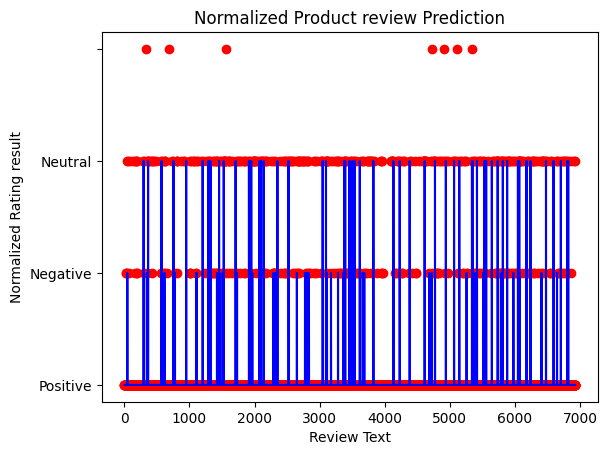

In [249]:
plt.scatter(x_test_n,y_test,color = 'red')
plt.plot(x_test_n,logReg_pipe.predict(x_test),color = 'blue')
plt.title("Normalized Product review Prediction")
plt.xlabel('Review Text')
plt.ylabel('Normalized Rating result')
plt.show()